<a href="https://colab.research.google.com/github/Achintha444/Pump-it-Up-Data-Mining-the-Water-Table/blob/main/ML_Comp_Water_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libs

from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.feature_selection import mutual_info_regression

from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix

import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

In [ ]:
df = pd.read_csv("train_x.csv")
df_y = pd.read_csv("train_y.csv")

In [ ]:
df['status_group'] = df_y['status_group']

In [ ]:
df['status_group_y'],label = pd.factorize(df["status_group"])

In [ ]:
label

Index(['functional', 'non functional', 'functional needs repair'], dtype='object')

In [ ]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_y
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0


In [ ]:
df['date_recorded'] = pd.DatetimeIndex(df['date_recorded'])

In [ ]:
df['year'] = pd.DatetimeIndex(df['date_recorded']).year
df['month'] = pd.DatetimeIndex(df['date_recorded']).month
df['date'] = pd.DatetimeIndex(df['date_recorded']).day

In [ ]:
df['extraction_type_feature'] = pd.factorize(df["extraction_type"])[0]

In [ ]:
df['extraction_type_group_feature'] = pd.factorize(df["extraction_type_group"])[0]

In [ ]:
df['extraction_type_class_feature'] = pd.factorize(df["extraction_type_class"])[0]

In [ ]:
df['management_feature'] = pd.factorize(df["management"])[0]

In [ ]:
df['lga_feature'] = pd.factorize(df["lga"])[0]

In [ ]:
df['ward_feature'] = pd.factorize(df["ward"])[0]

In [ ]:
df['region_feature'] = pd.factorize(df["region"])[0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             59400 non-null  int64         
 1   amount_tsh                     59400 non-null  float64       
 2   date_recorded                  59400 non-null  datetime64[ns]
 3   funder                         55765 non-null  object        
 4   gps_height                     59400 non-null  int64         
 5   installer                      55745 non-null  object        
 6   longitude                      59400 non-null  float64       
 7   latitude                       59400 non-null  float64       
 8   wpt_name                       59400 non-null  object        
 9   num_private                    59400 non-null  int64         
 10  basin                          59400 non-null  object        
 11  subvillage     

In [ ]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group_y,year,month,date,extraction_type_feature,extraction_type_group_feature,extraction_type_class_feature,management_feature,lga_feature,ward_feature,region_feature
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.00000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,0.529596,2011.921667,4.375640,15.621498,2.28468,2.060724,1.239394,1.178485,50.439343,740.484024,9.752340
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,0.628080,0.958758,3.029247,8.687553,2.80128,2.500001,1.333230,2.256039,33.008536,521.945313,6.045713
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2002.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,2011.000000,2.000000,8.000000,0.00000,0.000000,0.000000,0.000000,21.000000,293.000000,5.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,0.000000,2012.000000,3.000000,16.000000,1.00000,1.000000,1.000000,0.000000,44.000000,660.000000,10.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,1.000000,2013.000000,7.000000,23.000000,4.00000,3.000000,2.000000,1.000000,80.000000,1119.000000,16.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,2.000000,2013.000000,12.000000,31.000000,17.00000,12.000000,6.000000,11.000000,124.000000,2091.000000,20.000000


In [ ]:
# check waht are missing features
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(10)

,Total,%
scheme_name,28166,47.4
scheme_management,3877,6.5
installer,3655,6.2
funder,3635,6.1
public_meeting,3334,5.6
permit,3056,5.1
subvillage,371,0.6
region_feature,0,0.0
district_code,0,0.0
construction_year,0,0.0


In [ ]:
df['subvillage_feature'] = df['subvillage'].fillna(df["subvillage"].describe()[2])

In [ ]:
df['subvillage_feature'] = pd.factorize(df["subvillage_feature"])[0]

In [ ]:
df['public_meeting_feature'] = df['public_meeting'].fillna(df["public_meeting"].describe()[2])

In [ ]:
df['public_meeting_feature'] = pd.factorize(df["public_meeting_feature"])[0]

In [ ]:
df['scheme_management_feature'] = df['scheme_management'].fillna(df["scheme_management"].describe()[2])

In [ ]:
df['scheme_management_feature'] = pd.factorize(df["scheme_management_feature"])[0]

In [ ]:
df['funder_feature'] = df['funder'].fillna(df["funder"].describe()[2])

In [ ]:
df['funder_feature'] = pd.factorize(df["funder_feature"])[0]

In [ ]:
df['installer_feature'] = df['installer'].fillna(df["installer"].describe()[2])

In [ ]:
df['installer_feature'] = pd.factorize(df["installer_feature"])[0]

In [ ]:
df['permit_feature'] = df['permit'].fillna(df["permit"].describe()[2])

In [ ]:
df['permit_feature'] = pd.factorize(df["permit_feature"])[0]

In [ ]:
df['payment_feature'] = pd.factorize(df["payment"])[0]

In [ ]:
df['water_quality_feature'] = pd.factorize(df["water_quality"])[0]

In [ ]:
df['quality_group_feature'] = pd.factorize(df["quality_group"])[0]

In [ ]:
df['quantity_feature'] = pd.factorize(df["quantity"])[0]

In [ ]:
df['quantity_group_feature'] = pd.factorize(df["quantity_group"])[0]

In [ ]:
df['source_type_feature'] = pd.factorize(df["source_type"])[0]

In [ ]:
df['source_feature'] = pd.factorize(df["source"])[0]

In [ ]:
df['source_class_feature'] = pd.factorize(df["source_class"])[0]

In [ ]:
df['waterpoint_type_feature'] = pd.factorize(df["waterpoint_type"])[0]

In [ ]:
df['waterpoint_type_group_feature'] = pd.factorize(df["waterpoint_type_group"])[0]

In [ ]:
#df["latitudeGroup"] =  pd.qcut(df.latitude, 6,labels=[0, 1, 2,3,4,5])
df["latitudeGroup"] =  pd.cut(df.latitude, labels=[0, 1, 2,3,4,5], bins=6)

In [ ]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_y,year,month,date,extraction_type_feature,extraction_type_group_feature,extraction_type_class_feature,management_feature,lga_feature,ward_feature,region_feature,public_meeting_feature,scheme_management_feature,funder_feature,installer_feature,permit_feature,payment_feature,water_quality_feature,quality_group_feature,quantity_feature,quantity_group_feature,source_type_feature,source_feature,source_class_feature,waterpoint_type_feature,waterpoint_type_group_feature,latitudeGroup
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0,2011,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,2013,3,6,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,4
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,0,2013,2,25,0,0,0,0,2,2,2,0,0,2,2,1,2,0,0,0,0,2,2,1,1,0,4
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,2013,1,28,1,1,1,0,3,3,3,0,0,3,3,1,1,0,0,2,2,3,3,0,1,0,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,2011,7,13,0,0,0,2,4,4,4,0,0,4,4,1,1,0,0,3,3,1,1,1,0,0,5


In [ ]:
df['date'].value_counts()

3     4084
4     2758
18    2531
15    2365
19    2347
23    2294
16    2268
17    2250
22    2141
27    2052
20    2041
26    2027
21    2017
24    2016
14    1938
13    1936
28    1889
25    1761
2     1657
12    1634
7     1623
8     1579
5     1572
6     1513
11    1503
30    1415
29    1349
10    1332
1     1322
9     1302
31     884
Name: date, dtype: int64

In [ ]:
df['latitudeGroup'].value_counts()

4    15607
1    12069
3    11765
2     8699
0     5952
5     5308
Name: latitudeGroup, dtype: int64

In [ ]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [ ]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [ ]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [ ]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [ ]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [ ]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [ ]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [ ]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [ ]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [ ]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [ ]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [ ]:
df['subvillage'].value_counts()

Madukani             508
Shuleni              506
Majengo              502
Kati                 373
Mtakuja              262
                    ... 
Tanganyika Pekasi      1
Mbiku                  1
Msaki                  1
Madukani Kati          1
Soya Mjini             1
Name: subvillage, Length: 19287, dtype: int64

In [ ]:
df['wpt_name'].value_counts()

none                    3563
Shuleni                 1748
Zahanati                 830
Msikitini                535
Kanisani                 323
                        ... 
Kwa Mwita Marwa            1
Masaki Health Centre       1
Kwa Matiasi Ndendya        1
Kwa Nkiwi                  1
Izigira                    1
Name: wpt_name, Length: 37400, dtype: int64

In [ ]:
df['subvillage'].value_counts()

Madukani             508
Shuleni              506
Majengo              502
Kati                 373
Mtakuja              262
                    ... 
Tanganyika Pekasi      1
Mbiku                  1
Msaki                  1
Madukani Kati          1
Soya Mjini             1
Name: subvillage, Length: 19287, dtype: int64

In [ ]:
df['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Yasi Naini                   1
Hasnan Murig (mbunge)        1
Pema                         1
W.F.D.P                      1
Sunamco                      1
Name: funder, Length: 1897, dtype: int64

In [ ]:
df['funder_feature'].value_counts()

20      12719
11       3114
16       2202
7        1374
67       1349
        ...  
1585        1
1617        1
1649        1
1681        1
1743        1
Name: funder_feature, Length: 1897, dtype: int64

In [ ]:
df['installer'].value_counts()

DWE              17402
Government        1825
RWE               1206
Commu             1060
DANIDA            1050
                 ...  
Company              1
Theo                 1
TSCR                 1
Meru Concrete        1
AQUA WEL             1
Name: installer, Length: 2145, dtype: int64

In [ ]:
df['installer_feature'].value_counts()

5       21057
28       1825
31       1206
22       1060
9        1050
        ...  
1873        1
1905        1
1937        1
1969        1
2031        1
Name: installer_feature, Length: 2145, dtype: int64

In [ ]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [ ]:
df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [ ]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [ ]:
df['permit_feature'].value_counts()

1    41908
0    17492
Name: permit_feature, dtype: int64

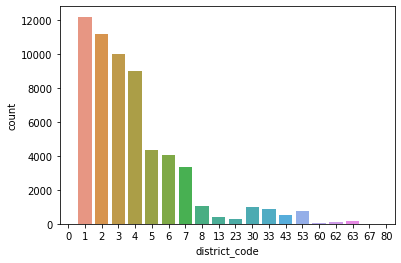

In [ ]:
sns.countplot(x="district_code", data=df)

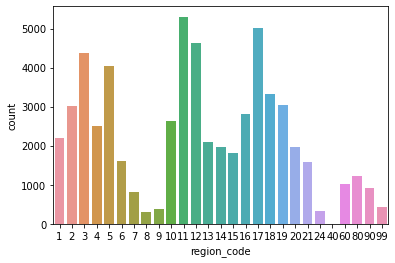

In [ ]:
sns.countplot(x="region_code", data=df)

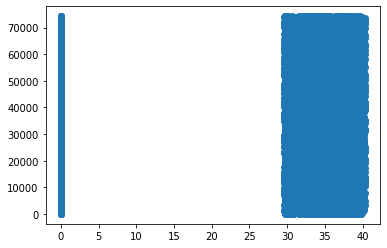

In [ ]:
plt.scatter(x=df['longitude'],y=df['id'])

In [ ]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [ ]:
df['public_meeting_feature'].value_counts()

0    54345
1     5055
Name: public_meeting_feature, dtype: int64

In [ ]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [ ]:
df['scheme_management'].count()

55523

In [ ]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [ ]:
df['scheme_management_feature'].value_counts()

0     40670
3      5206
6      3153
5      2883
4      2748
8      1680
2      1063
7      1061
1       766
10       97
9        72
11        1
Name: scheme_management_feature, dtype: int64

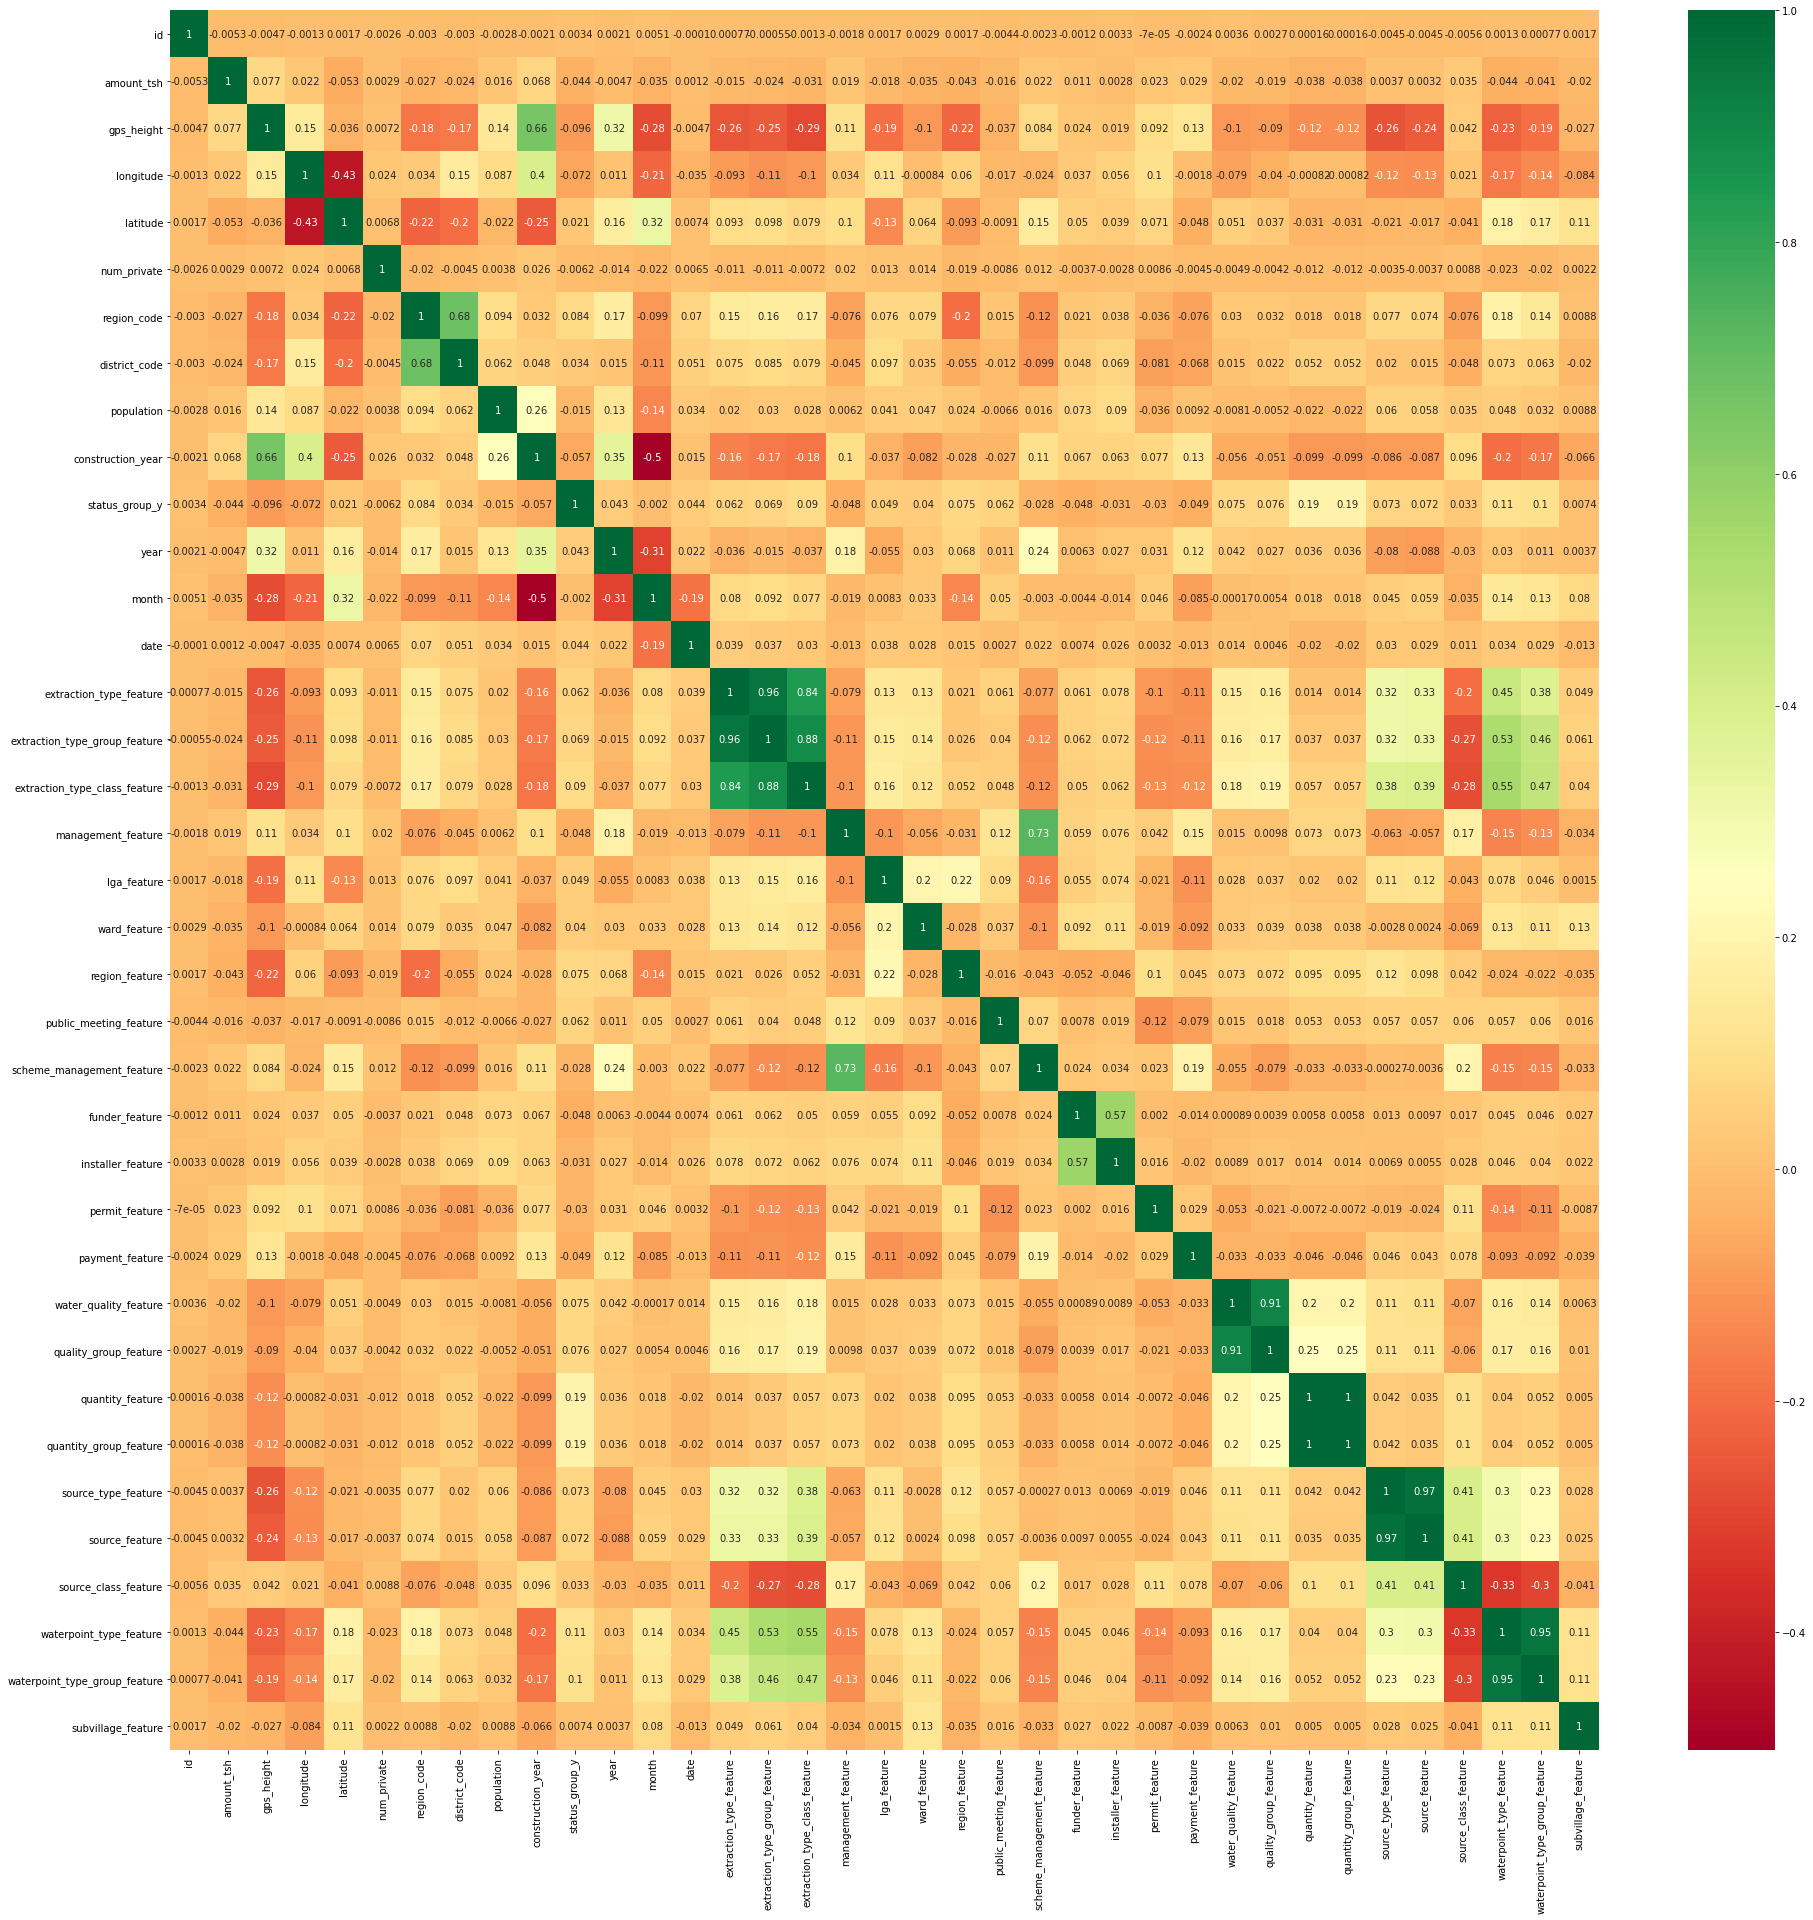

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(32,32))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")